In [2]:
import pandas as pd
main = pd.read_csv('survey_results_public.csv')

In [3]:
main

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
temp = main.sort_values(by='ConvertedComp', ascending=False)[['ConvertedComp','Age','LanguageWorkedWith']]

In [38]:
tempfilt = (temp['ConvertedComp'] < 2000000) & (temp['ConvertedComp'] > 1000)
temp.loc[tempfilt,'ConvertedComp'].mean()

104099.1363403007

In [43]:
countryGroup = main.groupby('Country')

In [53]:
usesPython = countryGroup['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
usesPython

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [52]:
countryResponces = main['Country'].value_counts()
countryResponces

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Tonga                                   1
Chad                                    1
Saint Vincent and the Grenadines        1
Papua New Guinea                        1
Brunei Darussalam                       1
Name: Country, Length: 179, dtype: int64

In [54]:
newDF = pd.concat([countryResponces,usesPython], axis='columns', sort=False)

In [55]:
newDF

,Country,LanguageWorkedWith
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Tonga,1,0
Chad,1,0
Saint Vincent and the Grenadines,1,0
Papua New Guinea,1,0


In [58]:
newDF.rename(columns={'Country':'NumRespondents' , 'LanguageWorkedWith': 'knowPython'}, inplace = True)

In [59]:
newDF

,NumRespondents,knowPython
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Tonga,1,0
Chad,1,0
Saint Vincent and the Grenadines,1,0
Papua New Guinea,1,0


In [60]:
newDF['PercentKnowPython'] = (newDF['knowPython']/newDF['NumRespondents'])

In [61]:
newDF

,NumRespondents,knowPython,PercentKnowPython
United States,20949,10083,0.481312
India,9061,3105,0.342677
Germany,5866,2451,0.417832
United Kingdom,5737,2384,0.415548
Canada,3395,1558,0.458910
...,...,...,...
Tonga,1,0,0.000000
Chad,1,0,0.000000
Saint Vincent and the Grenadines,1,0,0.000000
Papua New Guinea,1,0,0.000000


In [63]:
newDF.sort_values('PercentKnowPython', ascending = False)

,NumRespondents,knowPython,PercentKnowPython
Niger,1,1,1.000000
Timor-Leste,1,1,1.000000
Dominica,1,1,1.000000
Sao Tome and Principe,1,1,1.000000
Turkmenistan,7,6,0.857143
...,...,...,...
Gabon,2,0,0.000000
Burkina Faso,4,0,0.000000
Lao People's Democratic Republic,3,0,0.000000
Cape Verde,3,0,0.000000


In [64]:
import numpy as np
main.dropna()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
19,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,Not applicable - I did not use Stack Overflow ...,Tech articles written by other developers,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
38,39,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,42.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
43,44,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,43.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
82,83,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,22.0,Man,No,Straight / Heterosexual,South Asian,No,Appropriate in length,Neither easy nor difficult
103,104,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88161,88711,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Arab Emirates,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,East Asian,Yes,Too long,Neither easy nor difficult
88178,88728,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Romania,"Yes, part-time",Some college/university study without earning ...,"Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,33.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
88236,88786,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,28.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
88301,88853,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earni

In [70]:
main.replace([14,np.nan], ['young', 'No Reponse'])

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,No Reponse,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,young,Man,No,Straight / Heterosexual,No Reponse,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",No Reponse,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,No Reponse,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,No Reponse,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,No Reponse,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,No Reponse,...,No Reponse,Tech articles written by other developers;Tech...,No Reponse,Man,No,No Reponse,No Reponse,No,Appropriate in length,Easy
88879,88601,No Reponse,No,Never,The quality of OSS and closed source software ...,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,...,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse
88880,88802,No Reponse,No,Never,No Reponse,Employed full-time,No Reponse,No Reponse,No Reponse,No Reponse,...,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse
88881,88816,No Reponse,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",No Reponse,No Reponse,No Reponse,No Reponse,...,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse,No Reponse


In [77]:
main['MainBranch'] = main['MainBranch'].fillna('No Answer')

In [78]:
main

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,No Answer,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,No Answer,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,No Answer,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,No Answer,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
main['YearsCode'].dropna(axis='index').value_counts()

5                     7047
10                    6777
6                     6179
4                     5729
8                     5361
7                     5320
3                     5179
2                     3974
15                    3942
20                    3636
12                    3530
9                     3360
11                    2265
14                    2126
13                    2036
18                    1900
1                     1814
25                    1657
16                    1593
30                    1532
Less than 1 year      1367
17                    1349
19                    1018
22                    1016
35                     873
23                     745
21                     715
24                     693
40                     497
28                     465
32                     420
26                     409
27                     408
33                     353
38                     340
34                     327
37                     321
3

In [88]:
yrsExp.replace(['Less than 1 year', 'More than 50 years'], ['0.5','55'], inplace=True)

In [102]:
yrsExp.astype(float).mean()

11.675618049080034

In [103]:
%matplotlib inline

In [107]:
yrsExp = yrsExp.astype(float)

In [114]:
plotData = yrsExp.value_counts()

<AxesSubplot:>

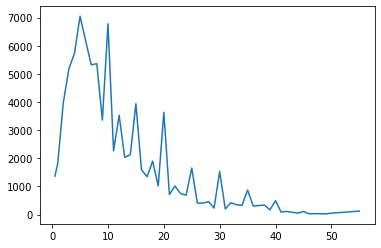

In [126]:
plotData.sort_index().plot()

In [147]:
openSourceSentiment = main['OpenSource'].replace(
    ['The quality of OSS and closed source software is about the same',
     'OSS is, on average, of HIGHER quality than proprietary / closed source software',
     'OSS is, on average, of LOWER quality than proprietary / closed source software'],
    ['Same', 'better', 'worse'])
openSourceSentiment

0          Same
1          Same
2          Same
3          Same
4        better
          ...  
88878      Same
88879      Same
88880       NaN
88881    better
88882    better
Name: OpenSource, Length: 88883, dtype: object

<AxesSubplot:>

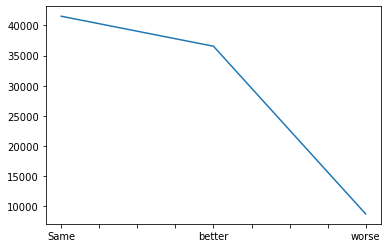

In [149]:
openSourceSentiment.value_counts().plot()